In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import statistics as st
from calendar import isleap

In [2]:
# Read Orography
OroData = xr.open_dataset('../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5IGP_Orography.nc')
OroD = OroData.sel(latitude=slice(32,24),longitude=slice(74,86))
# create mask
oro = OroD.z
oro.values = OroD.z.values/9.81
oro.attrs
oro.attrs['units']='meter'
oro.attrs['long_name']='Orography'
oro.values[oro.values>500.1]=np.NaN
mask=oro.values/oro.values

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


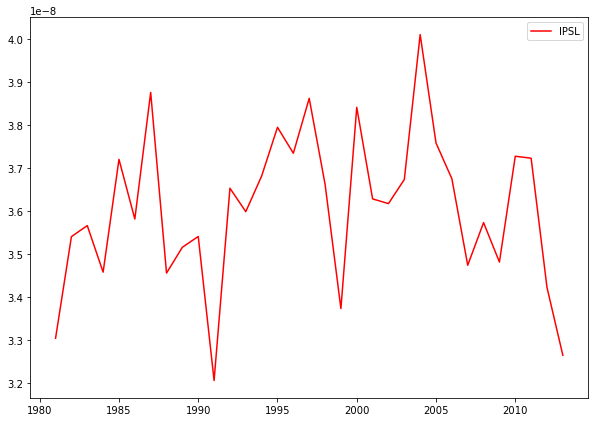

In [5]:
O3Histvals=[]
# O3 Data
O3DataIPSL = xr.open_dataset('../../Data/CMIP6PollutionData/RegridNHLowo3_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc')
O3DataIPSL.o3.time[0]
histO3IPSL=O3DataIPSL.sel(latitude=slice(32,24),longitude=slice(74,86)).o3.sel(plev=100000,method='nearest')
#histO3[0].values
histO3IPSL[1].values
histO3IPSL.values=histO3IPSL.values*mask

# Area Average
O3TS1=histO3IPSL.mean(dim=['latitude','longitude'], skipna=True)

O3Ts=(O3TS1[((O3TS1.time.dt.month>11) | (O3TS1.time.dt.month<2)) ].sel(time=slice('1980-12-1','2014-1-31')))
x=np.arange(1981,2014)
histO3Ts=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
    O3T=O3Ts.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
    histO3Ts.append(O3T.mean())
O3Histvals.append(histO3Ts) 

fig = plt.figure(figsize=(10,7))
plt.plot(x,O3Histvals[0],label='IPSL',color='Red')
plt.legend()

plt.savefig('HistO3_Anthropogenic.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


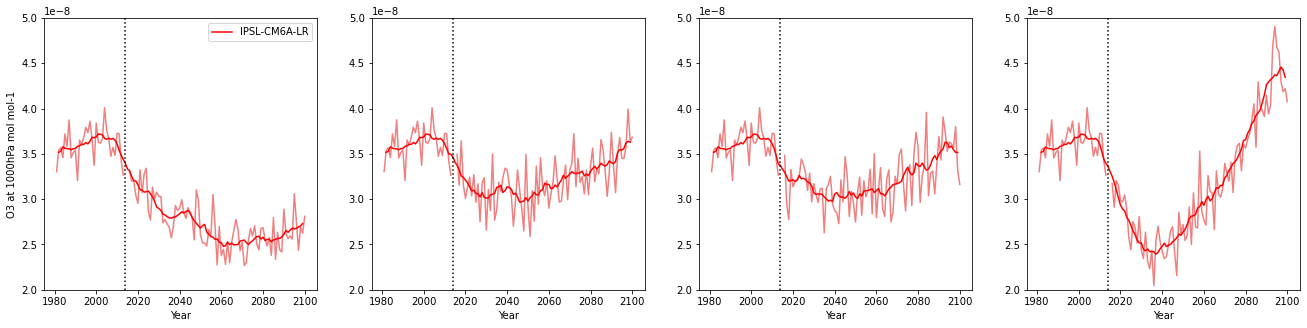

In [14]:
ssps=['126','245','370','585']
fig = plt.figure(figsize=(22.5,5))

i=1
for sp in ssps:
    
    x=np.arange(1981,2014)

    plt.subplot(1, 4, i)

    #plt.plot(x,EnsBCHist,label='Historical',color='gainsboro')
    plt.plot(x,O3Histvals[0],color='lightcoral')
    #plt.plot(x,O3Histvals[1],color='cornflowerblue')
    x=np.arange(2016,2101)
    O3Fut=[]
# O3 Data
    O3DataIPSL = xr.open_dataset('../../Data/CMIP6PollutionData/RegridNHLowo3_Amon_IPSL-CM6A-LR_ssp'+sp+'_r1i1p1f1_gr_201501-210012.nc')
    O3DataIPSL.o3.time[0]
    histO3IPSL=O3DataIPSL.sel(latitude=slice(32,24),longitude=slice(74,86)).o3
#histO3[0].values
    histO3IPSL[1].values
    histO3IPSL.values=histO3IPSL.values*mask

# Area Average
    O3TS1=histO3IPSL.mean(dim=['latitude','longitude'], skipna=True)

    O3Ts=(O3TS1[((O3TS1.time.dt.month>11) | (O3TS1.time.dt.month<2)) ].sel(time=slice('2015-12-1','2100-1-31')))
    #x=np.arange(1981,2014)
    histO3Ts=[]
    for yr in x :
        InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
        EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
        O3T=O3Ts.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
        histO3Ts.append(O3T.mean())
    O3Fut.append(histO3Ts) 

    
    plt.plot(x,O3Fut[0],color='lightcoral')
    jointList=O3Histvals[0]+O3Fut[0]
    S = pd.Series (jointList)
    xTotal=np.arange(1982,2100)
    rENS=S.rolling(10, center=True, min_periods=1).mean()
    plt.plot(xTotal,rENS,label='IPSL-CM6A-LR',color='red')
    #plt.plot(x,O3Fut[1],color='cornflowerblue')
    
    plt.ylim(2e-8,5e-8)
    plt.axvline(x=2014,color='black',linestyle=':')
    plt.xlabel('Year') 
    if i == 1:
        plt.legend()
        plt.ylabel('O3 at 1000hPa mol mol-1')
    i=i+1

plt.savefig('O3_ts_panel_10YearMean.eps')
plt.show()
        